In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
plt.style.use('bmh')
plt.style.use('paper')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from main import Burgers

# generate training data till time = 7.5
solver = Burgers()
solver.initialize()
solver.run(tf=7.5)

u_snapshots_train = solver.u_store.T
r_snapshots_train = solver.r_store.T

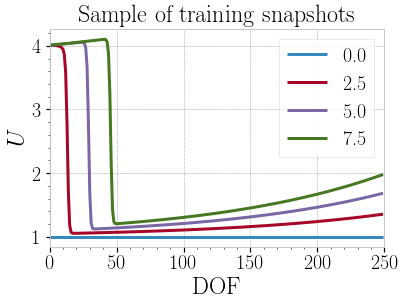

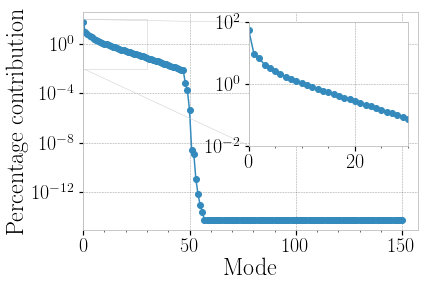

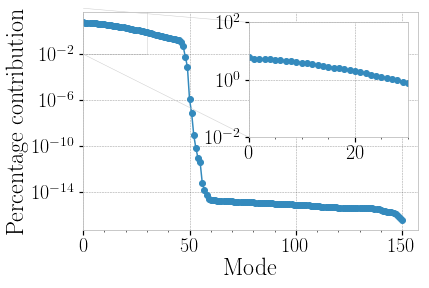

In [3]:
plt.figure()
time_plot = np.array([0.0, 2.5, 5.0, 7.5])
for t in time_plot:
    time_idx = int(t/solver.dt)
    plt.plot(u_snapshots_train[:,time_idx], label="%0.1f"%t)
plt.legend(loc="best")
plt.xlabel("DOF")
plt.ylabel(r"$U$")
plt.xlim(0, 250)
plt.title("Sample of training snapshots")
plt.savefig("figures/training_snapshots.pdf")
plt.savefig("figures/training_snapshots.png")

U, sigma, VT = np.linalg.svd(u_snapshots_train)
plt.figure()
fractional_contribution = sigma/sigma.sum()
plt.semilogy(fractional_contribution*100, "o-", lw=1.5)
plt.xlabel("Mode")
plt.ylabel(r"Percentage contribution")
plt.xlim(left=0)
plt.title("")
ax = plt.gca()
ax_inset = zoomed_inset_axes(ax, 2.5, loc=1)
plt.semilogy(fractional_contribution*100, "o-", lw=1.5)
ax_inset.set_xlim(0, 30)
ax_inset.set_ylim(1e-2, 1e2)
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.8")
plt.savefig("figures/basis_contribution.pdf")
plt.savefig("figures/basis_contribution.png")

U_r, sigma_r, VT_r = np.linalg.svd(r_snapshots_train)
plt.figure()
fractional_contribution = sigma_r/sigma_r.sum()
plt.semilogy(fractional_contribution*100, "o-", lw=1.5)
plt.xlabel("Mode")
plt.ylabel(r"Percentage contribution")
plt.xlim(left=0)
plt.title("")
ax = plt.gca()
ax_inset = zoomed_inset_axes(ax, 2.5, loc=1)
plt.semilogy(fractional_contribution*100, "o-", lw=1.5)
ax_inset.set_xlim(0, 30)
ax_inset.set_ylim(1e-2, 1e2)
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.8")
plt.savefig("figures/basis_contribution_r.pdf")
plt.savefig("figures/basis_contribution_r.png")

In [50]:
n_basis = 150
solver_rom = Burgers(rom_mode=True, rom_basis=U[:,0:n_basis])
solver_rom.initialize()
solver_rom.run(tf=50)
u_snapshots_rom = solver_rom.u_store.T

solver_test = Burgers()
solver_test.initialize()
solver_test.run(tf=50)
u_snapshots_test = solver_test.u_store.T

n_r_basis = 40
solver_diem = Burgers(rom_mode=True, rom_basis=U[:,0:n_basis], rom_diem=True, rom_diem_basis=U_r[:,0:n_r_basis])
solver_diem.initialize()
solver_diem.run(tf=50)
u_snapshots_diem = solver_diem.u_store.T

#solver_adiem = Burgers(rom_mode=True, rom_basis=U[:,0:n_basis], rom_diem=True, rom_diem_basis=U_r[:,0:n_r_basis], rom_adiem=True)
#solver_adiem.initialize()
#solver_adiem.run(tf=50)
#u_snapshots_adiem = solver_adiem.u_store.T

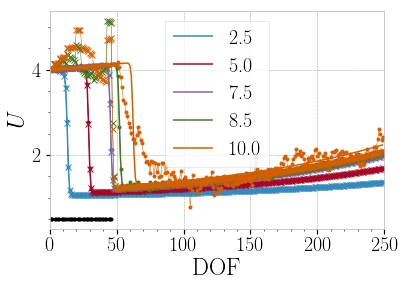

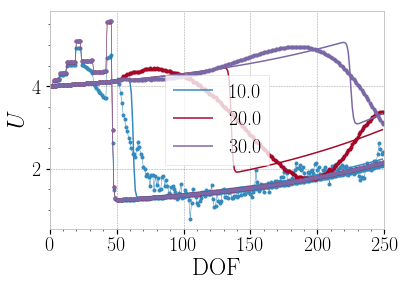

In [51]:
plt.figure()
time_plot = np.array([2.5, 5.0, 7.5, 8.5, 10.0])
for t in time_plot:
    time_idx = int(t/solver.dt)
    p = plt.plot(u_snapshots_test[:,time_idx], "-", label="%0.1f"%t, lw=1.5)
    color = p[0].get_color()
    plt.plot(u_snapshots_rom[:,time_idx], ".-", c=color, lw=0.5)
    plt.plot(u_snapshots_diem[:,time_idx], "x-", c=color, lw=0.5)
plt.plot(solver_diem.rom_diem_idx, np.ones_like(solver_diem.rom_diem_idx)*0.5, ".-", c="k", lw=0.5)

plt.legend(loc="best")
plt.xlabel("DOF")
plt.ylabel(r"$U$")
plt.xlim(0, 250)
plt.savefig("figures/rom_predictions_0.pdf")
plt.savefig("figures/rom_predictions_0.png")
plt.figure()
time_plot = np.array([10, 20, 30.0])
for t in time_plot:
    time_idx = int(t/solver.dt)
    p = plt.plot(u_snapshots_test[:,time_idx], "-", label="%0.1f"%t, lw=1.5)
    color = p[0].get_color()
    plt.plot(u_snapshots_rom[:,time_idx], ".-", c=color, lw=0.5)
    plt.plot(u_snapshots_diem[:,time_idx], ".-", c=color, lw=0.5)

plt.legend(loc="best")
plt.xlabel("DOF")
plt.ylabel(r"$U$")
plt.xlim(0, 250)
plt.savefig("figures/rom_predictions_1.pdf")
plt.savefig("figures/rom_predictions_1.png")

In [ ]:
# diem?